Анна Ширева

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from os.path import join

Будем учиться классифицировать жанры музыки. В отличие от проекта, который вас ждет, здесь мы будем работать не с сырыми данными (аудиодорожками), а уже в осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [13]:
DATA_PATH = "..\\data"
data = pd.read_csv(join(DATA_PATH, "train.csv"))
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [14]:
data.shape

(17996, 17)

In [15]:
data.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [16]:
data.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [17]:
X = data.drop(columns=['Artist Name','Track Name', 'Class'])
X = X.fillna({'Popularity': data.Popularity.median(),'key': data.key.median(),'instrumentalness': data.instrumentalness.median()})
y = data.Class
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

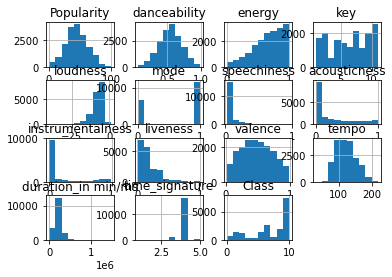

In [7]:
data.hist()
plt.show()

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [18]:
tr = DecisionTreeClassifier()
parameters = {'max_depth':[1, 10], 'min_samples_split':[2, 10], 'min_samples_leaf':[1, 10]}
search = GridSearchCV(tr,parameters)
search.fit(X, y)
best_tree = search.best_estimator_
predicted = search.predict(X_test)

In [19]:
accuracy_score(y_test,predicted)

0.5605690153367415

### Задание 3. Другие модели (5 баллов за модель)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

In [20]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.29228717492776174

Дерево получилось лучше.

### Задание 4. (3 балла)

Раз уж вы работаете в командах, то у вас есть шанс обсудить любимые фильмы. Напишите сюда 3 фильма, которые хотели бы посмотреть вместе:

Меня не было на лекции, так что моя команда состоит из одного человека, и вот, что бы я хотела посмотреть, пока Netflix на телеке ещё работает:

1.The Tinder Swindler

2.Inventing Anna

3.The Adam Project 